In [1]:
# import libraries
import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
from scipy.interpolate import interp1d
import pickle 
import xarray as xr
import matplotlib.colors as colors
import seaborn as sns
import cmocean

# for mapping
import cartopy.crs as ccrs
# https://cosima-recipes.readthedocs.io/en/latest/tutorials/Making_Maps_with_Cartopy.html
import cartopy.feature as cft
# BIG issue with cartopy: see here https://github.com/SciTools/cartopy/issues/1325 at @jypeter
# I had to download a bunch of stuff myself and put it in ~/.local/share/cartopy/shapefile/.../...
# https://stackoverflow.com/questions/30030328/correct-placement-of-colorbar-relative-to-geo-axes-cartopy
# https://scitools.org.uk/cartopy/docs/v0.15/examples/axes_grid_basic.html
land_110m = cft.NaturalEarthFeature('physical', 'land', '110m', edgecolor='black', facecolor='gray', linewidth=0.5) # continents

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [2]:
data = open("../data/output_data_for_figures/data_figED1.pkl", "rb")
data = pickle.load(data)

In [3]:
mask = data['mask']
f100 = data['f100']
lonT = data['lon']
latT = data['lat']
depthT = data['depth']

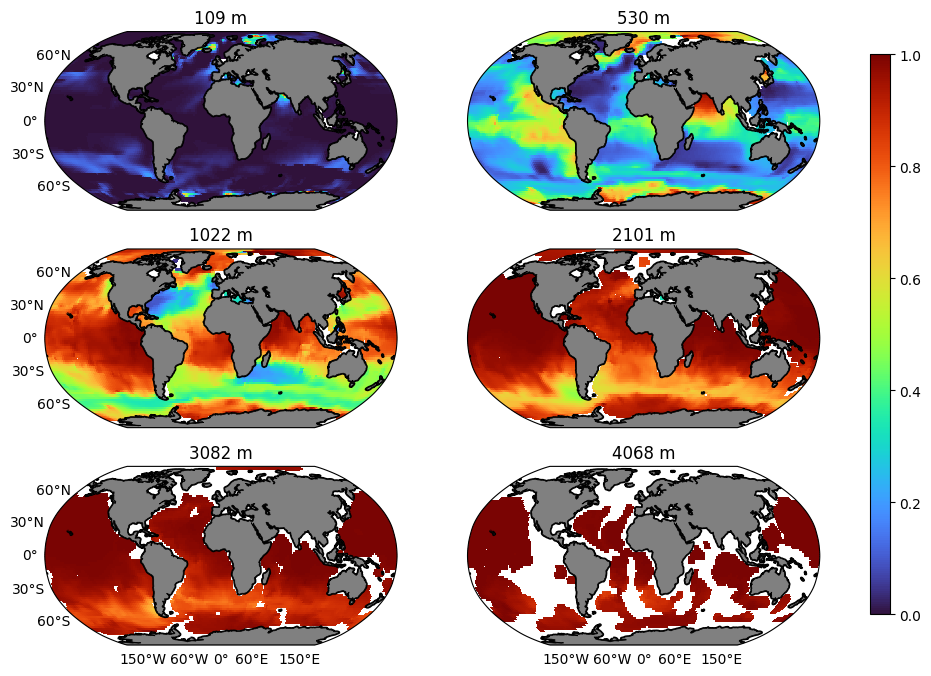

In [4]:
# Big fig
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(10,8),subplot_kw={'projection': ccrs.Robinson()})

#pal = 'jet'
pal = cmocean.cm.thermal
pal = 'turbo'
#pal = 'RdBu'
#pal = 'gist_rainbow'
#pal = 'cubehelix'

deep_pixel_mask = mask[:,:,np.newaxis]

# fig1
ax1.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p1 = ax1.pcolormesh(lonT, latT, (f100[:,:,8]*deep_pixel_mask[:,:,0]), vmin = 0, vmax = 1, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal) # /!\ vmax is saturated at 60 m -> removed saturation
d = int(np.floor(depthT[8]))
ax1.add_feature(land_110m)
ax1.set_title(str(d)+ ' m')
gl = ax1.gridlines(draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = False
gl.ylines = False

# fig2
ax2.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p2 = ax2.pcolormesh(lonT, latT, (f100[:,:,19]*deep_pixel_mask[:,:,0]), vmin = 0, vmax = 1, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal) 
d = int(np.floor(depthT[19]))
ax2.add_feature(land_110m)
ax2.set_title(str(d)+ ' m')

# fig3
ax3.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p3 = ax3.pcolormesh(lonT, latT, (f100[:,:,25]*deep_pixel_mask[:,:,0]), vmin = 0, vmax = 1, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal)
d = int(np.ceil(depthT[25]))
ax3.add_feature(land_110m)
ax3.set_title(str(d)+ ' m')
gl = ax3.gridlines(draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = False
gl.ylines = False

# fig4
ax4.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p4 = ax4.pcolormesh(lonT, latT, (f100[:,:,33]*deep_pixel_mask[:,:,0]), vmin = 0, vmax = 1, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal)
d = int(np.ceil(depthT[33]))
ax4.add_feature(land_110m)
ax4.set_title(str(d)+ ' m')

# fig5
ax5.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p5 = ax5.pcolormesh(lonT, latT, (f100[:,:,38]*deep_pixel_mask[:,:,0]), vmin = 0, vmax = 1, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal)
d = int(np.floor(depthT[38]))
ax5.add_feature(land_110m)
ax5.set_title(str(d)+ ' m')
gl = ax5.gridlines(draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-150, -60, 0, 60, 150])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = False
gl.ylines = False

# fig6
ax6.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p6 = ax6.pcolormesh(lonT, latT, (f100[:,:,42]*deep_pixel_mask[:,:,0]), vmin = 0, vmax = 1, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal)
d = int(np.floor(depthT[42]))
ax6.add_feature(land_110m)
ax6.set_title(str(d)+ ' m')
gl = ax6.gridlines(draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False
gl.xlocator = mticker.FixedLocator([-150, -60, 0, 60, 150])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = False
gl.ylines = False

cbar_ax = fig.add_axes([.95, 0.15, 0.02, 0.7])
col = fig.colorbar(p4, cax=cbar_ax)
#col.set_label('[%]')
plt.savefig('FigED1.jpg', bbox_inches = "tight", dpi=300)
plt.show()